<a href="https://colab.research.google.com/github/janinerottmann/E-Business/blob/main/Thunderbird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Data
df = pd.read_csv("https://raw.githubusercontent.com/janinerottmann/E-Business/main/data/data.csv", sep=';')

In [3]:

# Data Preparation
df.rename(columns = {'Goal conversion rate all goals':'Conversion Rate', 
                     'Goal completions all goals':'Conversions'}, inplace = True)

for col in ['Bounce rate', 'New visits %', 'Conversion Rate']:
  df[col] = df[col].str.replace(',',".")
  df[col] = df[col].astype(float)

In [4]:
df.head(10)

,Region,Land,Source,Medium,Unique visitors,Visits,New visits,Bounces,Pageviews,Total time on site,...,Avg. pageviews per visit,Pageviews2,Unique pageviews,Entrances,Exits,Total time on page,Avg. time on page,Exit rate,Conversions,Conversion Rate
0,Arizona,USA,(direct),(none),7669,19118,7332,9071,64454,1255:43:51,...,"3,4",64454,45074,19048,19048,1252:15:21,00:01:39,"0,30",9143,0.48
1,(not set),not set,google,organic,5462,7756,5094,3330,31031,521:09:20,...,"4,0",31031,24545,7733,7733,520:11:02,00:01:20,"0,25",2656,0.34
2,Arizona,USA,google,organic,5445,11489,4675,4162,50256,805:55:20,...,"4,4",50256,37850,11467,11467,802:18:35,00:01:14,"0,23",4689,0.41
3,(not set),not set,(direct),(none),5307,7206,5153,3739,18260,347:26:08,...,"2,5",18260,15033,7176,7176,347:03:14,00:01:53,"0,39",3086,0.43
4,California,USA,google,organic,3903,5753,3638,2470,23536,307:17:50,...,"4,1",23536,18575,5740,5740,297:45:56,00:01:00,"0,24",2232,0.39
5,California,USA,(direct),(none),2857,4678,2707,2045,17401,272:27:33,...,"3,7",17401,12423,4666,4666,268:17:15,00:01:16,"0,27",2422,0.52
6,New York,USA,google,organic,2658,3612,2492,1635,12836,155:59:06,...,"3,6",12836,10304,3607,3606,155:57:58,00:01:01,"0,28",1305,0.36
7,Arizona,USA,my.thunderbird.edu,referral,854,2425,539,892,11146,185:03:31,...,"4,6",11146,8323,2419,2419,183:26:18,00:01:16,"0,22",1226,0.51
8,Texas,USA,google,organic,1987,2541,1855,985,10379,129:47:23,...,"4,1",10379,8195,2537,2537,129:38:18,00:01:00,"0,24",965,0.38
9,Arizona,USA,google,cpc,2834,3123,2378,1656,8666,696:33:24,...,"2,8",8666,6533,3121,3120,691:57:13,00:06:21,"0,36",1130,0.36


# Analyse

## .. nach Regionen

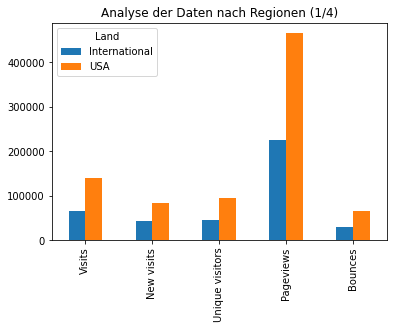

In [5]:
kpi = ['Visits', 'New visits', 'Unique visitors', 'Pageviews','Bounces']
df[df.Land.isin(['USA','International'])].groupby(['Land'])[kpi].sum().T.plot(kind='bar', title='Analyse der Daten nach Regionen (1/4)')

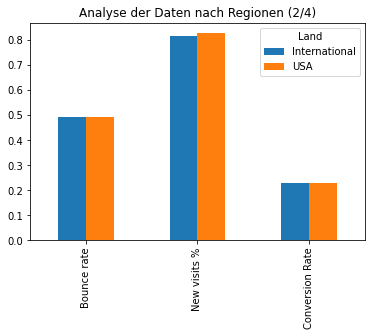

In [6]:
kpi = ['Bounce rate','New visits %' ,'Conversion Rate']
df[df.Land.isin(['USA','International'])].groupby(['Land'])[kpi].mean().T.plot(kind='bar', title='Analyse der Daten nach Regionen (2/4)')

In [7]:
regions = ['Arizona', 'California', 'New York', 'Texas', 'Florida']
compare_regions = df.loc[df['Region'].isin(regions)]

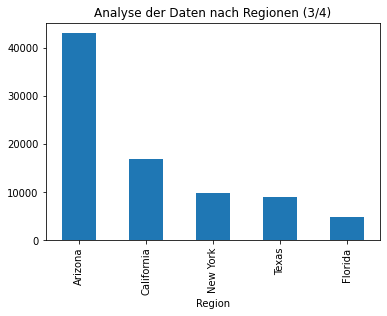

In [8]:
compare_regions.groupby(['Region'])['Visits'].sum().sort_values(ascending=False).T.plot(kind='bar', title='Analyse der Daten nach Regionen (3/4)')

##.. nach Kanälen

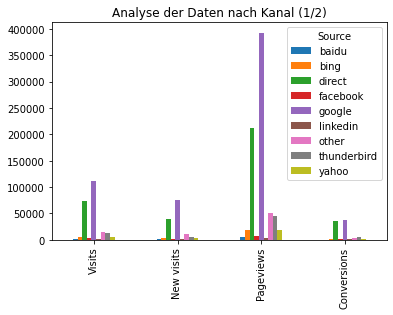

In [9]:
source_list = ['google','yahoo','linkedin', 'facebook','thunderbird','bing','baidu','direct']

for source in source_list:
  df.loc[df.Source.str.contains(source), 'Source'] = source

df.loc[~df["Source"].isin(source_list), "Source"] = "other"

kpi = ['Visits', 'New visits', 'Pageviews', 'Conversions' ]
df.groupby(['Source'])[kpi].sum().T.plot(kind='bar', title='Analyse der Daten nach Kanal (1/2)')

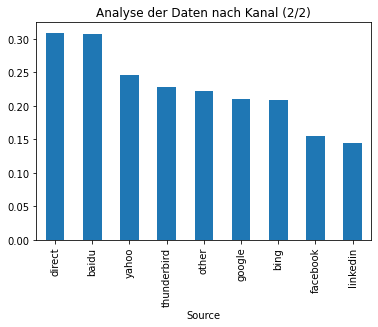

In [10]:
df.groupby(['Source'])['Conversion Rate'].mean().sort_values(ascending=False).T.plot(kind='bar', title='Analyse der Daten nach Kanal (2/2)')